**Data Analysis with Pandas**

**Data Science**

MS in Artificial Intelligence - Tecnologico de Monterrey

---

*   Author: Ricardo Espinosa



---

Each row in this data set (LaqnData.csv) shows an hourly measurement record of one of the following five air pollutants:

* NO (nitric oxide)
* NO2 (nitrogen dioxide)
* NOX (nitrous oxides)
* PM10 (suspended particles with an aerodynamic diameter equal to or less than 10 micrometers)
* PM2.5 (suspended particles with an aerodynamic diameter equal to or less than 2.5 micrometers)

Data was collected at one location in London throughout 2017.


1. Download the file: LaqnData.csv and save all its records in a dataframe (air_df).
* Observe the structure and content of the dataframe with the attributes and methods studied (shape, columns, head(), tail(), dtypes)
* Calculate the percentage of missing values per column.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

air_df = pd.read_csv('LaqnData.csv')

In [ ]:
air_df.shape

(43800, 6)

In [ ]:
air_df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [ ]:
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [ ]:
air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [ ]:
air_df.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

In [ ]:
#Percentage of missing values per column
air_df.isnull().sum()/air_df.shape[0]*100

Site                       0.000000
Species                    0.000000
ReadingDateTime            0.000000
Value                      7.374429
Units                      0.000000
Provisional or Ratified    0.000000
dtype: float64

2. Get the number of unique values per column (nunique()) to answer:
* How many measurements were made? **A total of 43,800 measurements were made among the 5 air pollutants. Each pollutant has a total of 8,760 measurement records.**
* How many air pollutants (Species) were analyzed? **5**
* Which columns do not add any informative value because the same value in the entire data set? Delete them from the dataframe. The 'Site', 'Units' and 'Provisional or Ratified' columns do not add any value because their data/values are the same in all rows
* The Units column also has no informative value. Check it with the unique() function and remove it from the dataframe.

In [ ]:
air_df.nunique()

Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

In [ ]:
air_df['Site'].unique()

array(['CT3'], dtype=object)

In [ ]:
air_df['Species'].unique()

array(['NO', 'NO2', 'NOX', 'PM10', 'PM2.5'], dtype=object)

In [ ]:
air_df['ReadingDateTime'].unique()

array(['01/01/2017 00:00', '01/01/2017 01:00', '01/01/2017 02:00', ...,
       '31/12/2017 21:00', '31/12/2017 22:00', '31/12/2017 23:00'],
      dtype=object)

In [ ]:
air_df['Value'].unique()

array([ 3.5,  3.6,  2.2, ..., -7. , -8. , -6. ])

In [ ]:
air_df['Units'].unique()

array(['ug m-3', 'ug m-3 as NO2', 'ug/m3'], dtype=object)

In [ ]:
air_df['Provisional or Ratified'].unique()

array(['R'], dtype=object)

In [ ]:
#The Units column also has no informative value. Check it with the unique() function and remove it from the dataframe.
air_df.drop(columns=['Site','Units','Provisional or Ratified'], inplace=True)

air_df

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2
3,NO,01/01/2017 03:00,2.1
4,NO,01/01/2017 04:00,3.3
...,...,...,...
43795,PM2.5,31/12/2017 19:00,-2.0
43796,PM2.5,31/12/2017 20:00,6.0
43797,PM2.5,31/12/2017 21:00,5.0
43798,PM2.5,31/12/2017 22:00,5.0


3. Count values by category (value_counts()) for the Species column and determine if the readings for each contaminant match the total measurements. **Indeed, the readings for each contaminant coincide with the total of 8,760 measurement records per contaminant.**

In [ ]:
air_df['Species'].value_counts()

NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: Species, dtype: int64

4. Use the groupby() function to determine the average value per pollutant.

In [ ]:
air_df.groupby(['Species']).mean(['Value']) #Average in ug/m3 per pollutant

,Value
Species,
NO,15.045115
NO2,38.010185
NOX,61.078661
PM10,22.551704
PM2.5,14.999831


5. The data set is in a long format. Apply the appropriate function to change it to wide format (`ReadingDateTime` as index and each pollutant in a column). Name the resulting dataframe pvt_df.

In [ ]:
pvt_df = air_df.pivot(index='ReadingDateTime',
            columns='Species',
            values='Value')

pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


6. Through the describe() function it responds:
* What is the highest NO2 value recorded? **120.2 ug/m3** What day does it belong to? **01/24/2017 at 7:00 p.m.**
* What is the lowest PM10 value recorded? **-5.6 ug/m3** What day does it belong to? **09/12/2017 at 11:00 p.m.**
* What is the median of NO? **7.1 ug/m3** How is it interpreted? **The median is the value that is right in the middle of a set of data, ordering them in ascending or descending order.**
* What is the first quartile of PM2.5? **7 ug/m3** What does it mean? **It is the value that 25% of the values of a data set are below when ordered from lowest to highest or vice versa, in this case it was ordered ascending.**

In [ ]:
pvt_df.describe()

Species,NO,NO2,NOX,PM10,PM2.5
count,8660.000000,8660.000000,8660.000000,8657.000000,5933.000000
mean,15.045115,38.010185,61.078661,22.551704,14.999831
std,26.678565,18.580841,54.584805,15.344755,13.558588
min,-2.000000,2.800000,1.000000,-5.600000,-8.000000
25%,3.100000,23.800000,30.300000,13.900000,7.000000
50%,7.100000,35.300000,46.900000,19.500000,11.000000
75%,15.500000,49.900000,73.800000,27.300000,18.000000
max,401.799990,120.200000,734.299990,633.099980,128.000000


In [ ]:
pvt_df['NO2'].max()

120.2

In [ ]:
pvt_df[pvt_df['NO2']==pvt_df['NO2'].max()]

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
24/01/2017 19:00,148.60001,120.2,348.10001,44.4,42.0


In [ ]:
pvt_df[pvt_df['PM10']==pvt_df['PM10'].min()]

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
12/09/2017 23:00,0.1,7.0,7.1,-5.6,NaN


7. Draw a histogram for each column of pvt_df. Which pollutant has the greatest variability? **The pollutant with the greatest variability is 'NOX' since it has a greater range in its distribution of values (x axis of the histogram from 0 to 700). The same variability can be identified by running the "pvt_df.describe()" function and analyzing the standard deviation of each data series for each contaminant.**

array([[<Axes: title={'center': 'NO'}>, <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOX'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'PM2.5'}>, <Axes: >]], dtype=object)

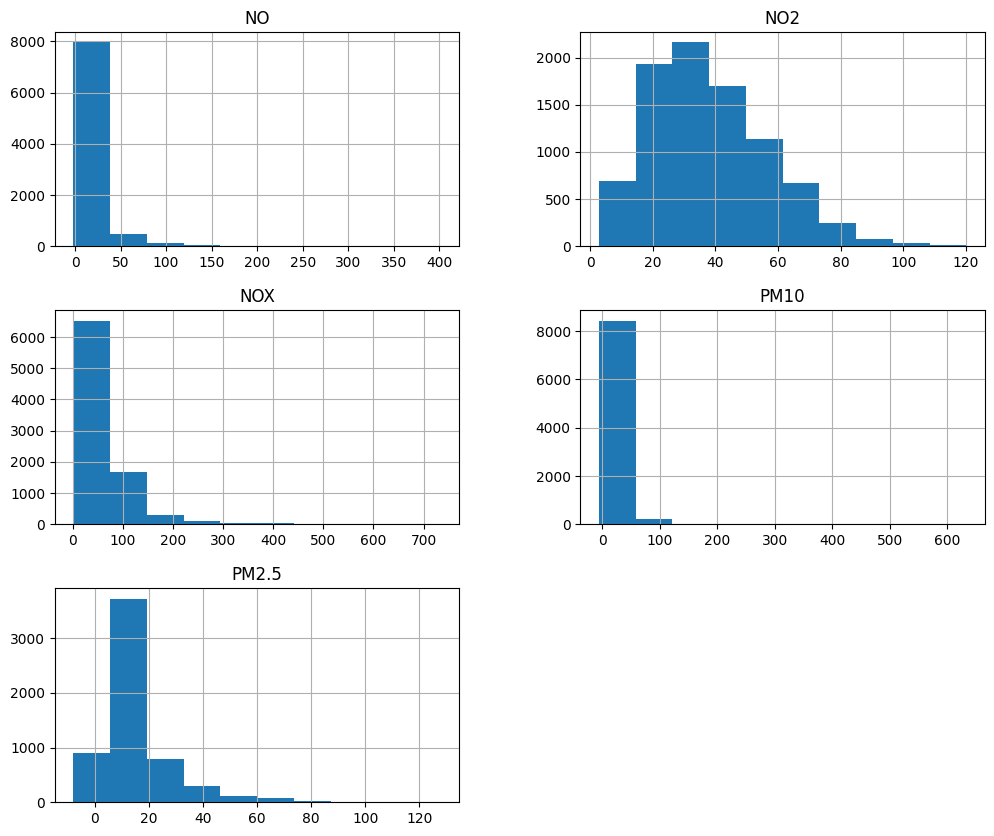

In [ ]:
pvt_df.hist(figsize=(12,10))

8. Run the following code and comment what each line does:

In [ ]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True) #Creates a new dataframe called datetime_df which divides the string/text type column 'ReadingDateTime' (which belongs to air_df) whenever there is a space ' ' (delimiter), expand=True defines the creation of new columns for each new character of the separation created.
datetime_df.columns = ['Date','Time'] #Naming the new separate columns 'Date' and 'Time' respectively, originally '0' and '1'.
datetime_df #calling the dataframe 'datetime_df'.

date_df = datetime_df.Date.str.split('/',expand=True) #Creates a new dataframe called date_df which divides the string/text type column 'Date' (which belongs to datetime_df) whenever there is a diagonal '/' (delimiter), expand=True defines the creation of new columns for each new character of the separation created.
date_df.columns = ['Day','Month','Year'] #Naming the new separate columns as 'Day', 'Month' and 'Year' respectively, originally '0', '1' and '2'.
date_df #calling the dataframe 'date_df'.

air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year']) #'air_df' is recreated by making a union of 'air_df' (by applying the "join" function) with 'date_df' of all the rows of both data frames (for example, row 1 = row 1 of 'air_df' + row 1 of ' date_df'), the result of this first union is applied another union/'join' to ''datetime_df' where the fusion focuses on the values that are equal to the 'Time' (.Time) column. Finally, the 'ReadingDateTime' and 'Year' columns are eliminated.
air_df = air_df.set_index(['Month','Day','Time','Species']) #The columns 'Month', 'Day', 'Time' and 'Species' are defined as index.
air_df #calling the new dataframe 'air_df'.

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Execute the following statement and compare its output with that of the previous code (exercise 8). They are equal? **No, they are not the same. The output of the previous code, the columns 'Month', 'Day', 'Time' and 'Species' are index and in the code of this instruction 'Species' is broken down into the 5 pollutants, each one representing a column with its respective worth.**

In [ ]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

10. Explain what the differences and similarities are between the melt()/pivot() pair and the stack()/unstack() pair.
**The melt() function converts/changes a data frame that has a wide format to a long format, while the pivot() function does the opposite.**

**Both functions are used in two-dimensional data structure.**

**In a dataframe that contains multiple levels of index, the unstack() function "shreds" the last level of indexing to columns, the more levels of indexing there are, the more unstack() functions will have to be executed until reaching level 1 (first column index from left to right), while the stack() function will reversively make calls to the unstack() function.**

**Both functions change the appearance and structure of a dataframe.**

If you had to choose a counterpart for melt() between stack()/unstack(), which one would you choose? **unstack()** Why? **Because stack() is used to convert data from wide to long like melt(), while unstack() does it from long to wide like pivot().**